In [1]:
#define library and imorting data sets

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

train = pd.read_csv('C:/Users/deepak/Desktop/Python/Loan_Prediction/New folder/train.csv')
test = pd.read_csv('C:/Users/deepak/Desktop/Python/Loan_Prediction/New folder/test.csv')

C:\Users\deepak\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\deepak\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\deepak\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\deepak\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Use

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [18]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
#Impute the values:
from scipy.stats import mode
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Gender"]=le.fit_transform(train["Gender"])
train["Married"]=le.fit_transform(train["Married"])
train["Dependents"]=le.fit_transform(train["Dependents"])
train["Self_Employed"]=le.fit_transform(train["Self_Employed"])
train["Property_Area"]=le.fit_transform(train["Property_Area"])
train["Self_Employed"]=le.fit_transform(train["Self_Employed"])
train["Education"]=le.fit_transform(train["Education"])

In [27]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,N


In [28]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [30]:
X = train[cols]
y = train['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [35]:
from sklearn.linear_model import LogisticRegression
lerg = LogisticRegression()
lerg.fit(X_train, y_train)

lerg_pred= lerg.predict(X_test)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
from sklearn import metrics
metrics.accuracy_score(y_test,lerg_pred)

0.7675675675675676

In [38]:
import seaborn as sn
from sklearn import metrics
lr_cm = metrics.confusion_matrix(y_test,lerg_pred)
lr_cm

array([[ 28,  41],
       [  2, 114]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lerg_pred ))

              precision    recall  f1-score   support

           N       0.93      0.41      0.57        69
           Y       0.74      0.98      0.84       116

   micro avg       0.77      0.77      0.77       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.81      0.77      0.74       185



In [25]:
train[Category]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
6,Male,Yes,0,Not Graduate,No,Urban,Y
7,Male,Yes,3+,Graduate,No,Semiurban,N
8,Male,Yes,2,Graduate,No,Urban,Y
9,Male,Yes,1,Graduate,No,Semiurban,N


In [22]:
df.apply(lambda x: x.value_counts(dropna=False)).T.stack()

Gender         Male            489.0
               Female          112.0
               NaN              13.0
Married        NaN               3.0
               Yes             398.0
               No              213.0
Dependents     NaN              15.0
               0               345.0
               1               102.0
               2               101.0
               3+               51.0
Education      Graduate        480.0
               Not Graduate    134.0
Self_Employed  NaN              32.0
               Yes              82.0
               No              500.0
Property_Area  Semiurban       233.0
               Urban           202.0
               Rural           179.0
Loan_Status    Y               422.0
               N               192.0
dtype: float64

In [46]:
data=train

In [39]:
from scipy.stats import mode
mode(data['Gender'])
mode(data['Gender']).mode[0]

C:\Users\deepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: '<' not supported between instances of 'str' and 'float'

In [50]:
data['Gender']=data['Gender'].replace(" ",0)

In [54]:
data['Gender'].value_counts(dropna=False)

Male      502
Female    112
Name: Gender, dtype: int64

In [53]:
#Impute the values:
from scipy.stats import mode
data['Gender'] = data['Gender'].fillna(df['Gender'].mode()[0])
data['Gender'] = data['Gender'].fillna(df['Gender'].median())

In [29]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


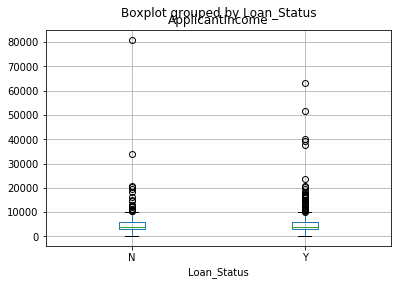

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")



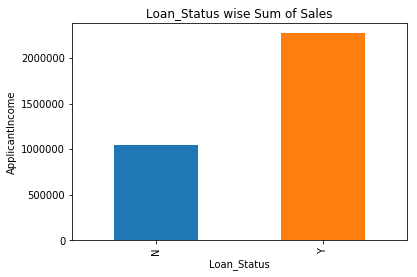

In [58]:
var = data.groupby('Loan_Status').ApplicantIncome.sum() #grouped sum of sales at Gender level
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Loan_Status')
ax1.set_ylabel('ApplicantIncome')
ax1.set_title("Loan_Status wise Sum of Sales")
var.plot(kind='bar')